# **Caltech 101 dataset exploration**

Pictures of objects belonging to 101 categories. About 40 to 800 images per category. Most categories have about 50 images. 

---

## **Contents**
- Importing dataset from Kaggle
- Directory format
- Looking at a few category images
  - Displaying 9 categories at random
- Images count
- Conclusion

---

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 
%matplotlib inline 

---

## **Importing dataset from kaggle**

The dataset is taken from kaggle (https://www.kaggle.com/athota1/caltech101). To import it locally, first download your Kaggle API token, run the following cells, and upload that file when prompted.

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()      # Choose the kaggle.json file downloaded above

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raahat98","key":"36600a230b41d0fe5051705bd066f73c"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d athota1/caltech101

 97% 255M/262M [00:03<00:00, 83.5MB/s]
100% 262M/262M [00:03<00:00, 85.0MB/s]


In [ ]:
! unzip caltech101.zip

In [8]:
DATASET_DIR = './101_ObjectCategories/'

---

## **Directory format**

```
- 101_ObjectCategories/
  - Faces
    - image_0001.jpg
      ...
    - image_0435.jpg
    ...
    ...
  - yin_yang
    - image_0001.jpg    
      ...
    - image_0060.jpg
```

---

## **Looking at a few category images**

In [9]:
folder_names = []
folder_names = [f for f in sorted(os.listdir(DATASET_DIR))]

print(len(folder_names)) 

102


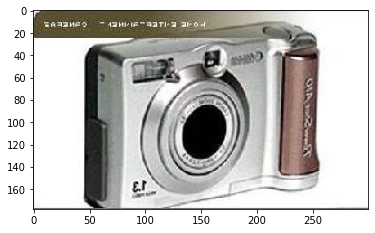

In [13]:
image_path = os.path.join(DATASET_DIR, 'camera/image_0002.jpg')
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()

In [14]:
print(image.shape)

(178, 300, 3)


### Displaying 9 categories at random

In [15]:
categories_num = 9
images_number = 9 
categories_selected = np.random.randint(0, 101, categories_num, dtype = 'l')

print('Selected categories:')
print([folder_names[i] for i in categories_selected])

Selected categories:
['beaver', 'nautilus', 'okapi', 'cellphone', 'panda', 'anchor', 'dollar_bill', 'cannon', 'cup']


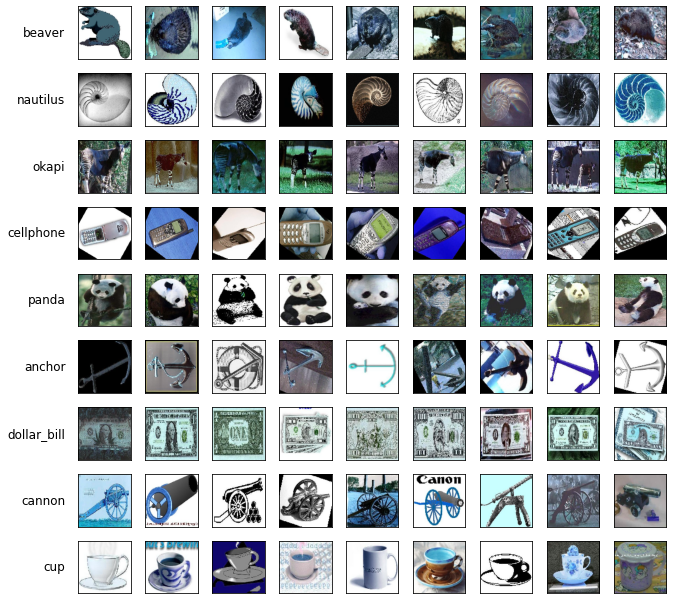

In [18]:
fig, ax = plt.subplots(nrows = 9, ncols = 9)
fig.set_size_inches(9.5, 8.5)
fig.subplots_adjust(wspace=0.1,hspace=0.1)


for i, category in enumerate(categories_selected):
  folder_path = os.path.join(DATASET_DIR, folder_names[category])
  image_names = [img for img in sorted(os.listdir(folder_path))][:images_number]
    
  for j, image_name in enumerate(image_names):
    image_path = os.path.join(folder_path, image_name)

    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100)) 

    ax[i,j].imshow(image)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    
    if j == 0:
      pad = 5 
      ax[i,j].annotate(folder_names[category], 
                       xy = (0, 0.5), 
                       xytext = (-ax[i,j].yaxis.labelpad - pad, 0), 
                       xycoords = ax[i,j].yaxis.label, 
                       textcoords = 'offset points',
                       size = 'large', 
                       ha = 'right', 
                       va ='center'
                       )
      
      
fig.tight_layout()
fig.show()

---

## **Images count**

In [19]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

In [20]:
for i, category in enumerate(folder_names):
  category_dict[i] = category
  
  folder_path = os.path.join(DATASET_DIR, category)
  image_names = [img for img in sorted(os.listdir(folder_path))]
  
  images_per_category_dict[i] = len(image_names)
  category_images_path_dict[i] = image_names
  
  print('{0}: {1}'.format(category, images_per_category_dict[i]))
  total_images += images_per_category_dict[i]
    
    
print('Total images in dataset: {}'.format(total_images))

BACKGROUND_Google: 468
Faces: 435
Faces_easy: 435
Leopards: 200
Motorbikes: 798
accordion: 55
airplanes: 800
anchor: 42
ant: 42
barrel: 47
bass: 54
beaver: 46
binocular: 33
bonsai: 128
brain: 98
brontosaurus: 43
buddha: 85
butterfly: 91
camera: 50
cannon: 43
car_side: 123
ceiling_fan: 47
cellphone: 59
chair: 62
chandelier: 107
cougar_body: 47
cougar_face: 69
crab: 73
crayfish: 70
crocodile: 50
crocodile_head: 51
cup: 57
dalmatian: 67
dollar_bill: 52
dolphin: 65
dragonfly: 68
electric_guitar: 75
elephant: 64
emu: 53
euphonium: 64
ewer: 85
ferry: 67
flamingo: 67
flamingo_head: 45
garfield: 34
gerenuk: 34
gramophone: 51
grand_piano: 99
hawksbill: 100
headphone: 42
hedgehog: 54
helicopter: 88
ibis: 80
inline_skate: 31
joshua_tree: 64
kangaroo: 86
ketch: 114
lamp: 61
laptop: 81
llama: 78
lobster: 41
lotus: 66
mandolin: 43
mayfly: 40
menorah: 87
metronome: 32
minaret: 76
nautilus: 55
octopus: 35
okapi: 39
pagoda: 47
panda: 38
pigeon: 45
pizza: 53
platypus: 34
pyramid: 57
revolver: 82
rhino: 

---

## **Conclusion**

While the dataset contains 101 cateories of everyday objects, it contains surprisingly few images. 9145 in total. In contrast, MNIST training set contains 60,000 images and that's considered small and basic. The main challenges in Caltech-101 arise due to its less number of images per category (averaging aroung 50). The advantage is that due to its small size, it is easier to experiment upon.